In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [89]:
df = pd.read_csv('supermarket.csv')

In [3]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [8]:
type(df['Date'][0])

str

In [91]:
#Change the Date column from string to datetime

df['Date'] = df['Date'].apply(pd.to_datetime)

In [81]:
type(df['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [11]:
df.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6


In [92]:
# Create 3 new columns from the Date column

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.dayofweek

In [13]:
df.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Year,Month,Day
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,2019,1,5
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,2019,3,4
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,2019,3,6


In [16]:
df.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,Year,Month,Day,Total Sales
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,13:08,Ewallet,522.83,4.761905,26.1415,9.1,2019,1,5,522.83
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,10:29,Cash,76.40,4.761905,3.8200,9.6,2019,3,4,76.40


In [93]:
# Which month had the most sales

df.groupby('Month').sum()['Total'].sort_values(ascending=False)

Month
1    116291.868
3    109455.507
2     97219.374
Name: Total, dtype: float64

In [94]:
type(df['Time'][0])

str

In [95]:
# Change the Time column from string to datetime

df['Time'] = df['Time'].apply(pd.to_datetime)
df['Time'] = [time.time() for time in df['Time']]

In [96]:
df.head(1)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Year,Month,Day
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,2019,1,5


In [97]:
type(df['Day'][0])

numpy.int64

In [99]:
# What day of the week had the highest average sales

df.groupby('Day').mean()['Total'].sort_values(ascending=False)

Day
5    342.200058
6    334.269868
3    328.617739
1    325.836997
4    316.016838
2    305.812133
0    303.192624
Name: Total, dtype: float64

In [100]:
# Breakdown of Total sales per day of week

day = df.groupby('Day').sum()
day

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Year,Month
Day,,,,,,,,,,
0,7216.00,638,1804.7180,37899.0780,36094.36,595.238095,1804.7180,894.2,252375,245
1,8664.28,862,2451.5355,51482.2455,49030.71,752.380952,2451.5355,1106.5,319002,312
2,7688.35,800,2082.4350,43731.1350,41648.70,680.952381,2082.4350,973.2,288717,280
3,7860.35,755,2159.4880,45349.2480,43189.76,657.142857,2159.4880,950.8,278622,264
4,7658.52,758,2091.7305,43926.3405,41834.61,661.904762,2091.7305,983.6,280641,289
5,9333.74,919,2672.4195,56120.8095,53448.39,780.952381,2672.4195,1131.9,331116,337
6,7250.89,778,2117.0425,44457.8925,42340.85,633.333333,2117.0425,932.5,268527,266


In [101]:
df['Date'] = df['Date'].apply(pd.to_datetime)

Text(0.5, 0, 'Day of Week')

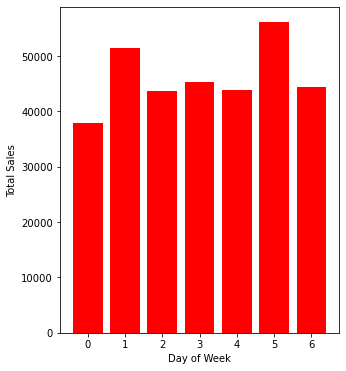

In [137]:
plt.figure(figsize = (5,6))

days = range(0,7)
plt.bar(days, day['Total'], color='red')
plt.xticks(days)
plt.ylabel('Total Sales')
plt.xlabel('Day of Week')

<AxesSubplot:xlabel='City'>

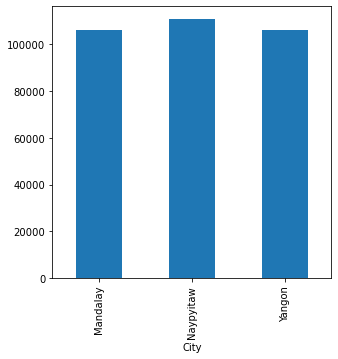

In [103]:
# What cities had the most sales

df.groupby('City').sum()['Total'].plot(kind='bar', figsize=(5,5))

In [69]:
df.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,Year,Month,Day,Total Sales
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,2019,1,5,522.83
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,10:29:00,Cash,76.40,4.761905,3.8200,9.6,2019,3,4,76.40


In [104]:
# Create a Datetime column

df['Datetime'] = pd.to_datetime(df['Date'].astype(str) + " " + df['Time'].astype(str))

In [105]:
df.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,Year,Month,Day,Datetime
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,2019,1,5,2019-01-05 13:08:00
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,10:29:00,Cash,76.40,4.761905,3.8200,9.6,2019,3,4,2019-03-08 10:29:00


In [106]:
#Create an Hour column from the Datetime column

df['Hour'] = df['Datetime'].dt.hour

In [73]:
df.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,cogs,gross margin percentage,gross income,Rating,Year,Month,Day,Total Sales,Datetime,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,522.83,4.761905,26.1415,9.1,2019,1,5,522.83,2019-01-05 13:08:00,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,76.40,4.761905,3.8200,9.6,2019,3,4,76.40,2019-03-08 10:29:00,10


In [107]:
# What are the top 10 best times for sales

df.groupby('Hour').mean()['Total'].sort_values(ascending=False).head(10)

Hour
14    371.426494
19    351.323124
11    337.525883
13    337.118709
17    330.340784
16    327.614591
10    311.103772
20    306.260360
15    305.681456
12    292.875084
Name: Total, dtype: float64

In [114]:
# Which city had the highest average rating in 2019

high = df[(df['Year'] == 2019)]
high.groupby('City').mean()['Rating'].sort_values(ascending=False)

City
Naypyitaw    7.072866
Yangon       7.027059
Mandalay     6.818072
Name: Rating, dtype: float64

In [121]:
# What is the breakdown by gender with regards to sales 

df.groupby('Gender').sum()['Total']

Gender
Female    167882.925
Male      155083.824
Name: Total, dtype: float64

In [122]:
# What are the different products for sale? 
df['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

In [136]:
# What products are women more likely to buy

women=df[df['Gender'] == 'Female']
women.groupby('Product line').mean()['Total'].sort_values(ascending=False)

Product line
Home and lifestyle        380.213639
Food and beverages        368.565750
Sports and travel         324.712739
Electronic accessories    322.643125
Fashion accessories       317.056250
Health and beauty         290.015414
Name: Total, dtype: float64

In [135]:
# What products are men more likely to buy

men=df[df['Gender'] == 'Male']
men.groupby('Product line').mean()['Total'].sort_values(ascending=False)

Product line
Health and beauty         348.099460
Sports and travel         340.360327
Electronic accessories    316.691965
Home and lifestyle        294.136241
Fashion accessories       291.079207
Food and beverages        273.499125
Name: Total, dtype: float64